# import libraries

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


# load dataset


In [32]:
df=pd.read_csv('dataset/forex.csv', index_col=[0], parse_dates=[0])


# exploring data


In [33]:
df.shape


(245444, 5)

In [34]:
df.sample(10)

,Open,High,Low,Close,Volume
Time,,,,,
2014-03-12 19:15:00,1.39036,1.39080,1.39034,1.39074,5.609300e+08
2010-09-02 21:15:00,1.28028,1.28058,1.28001,1.28042,4.266000e+08
2016-08-17 23:00:00,1.12759,1.12792,1.12734,1.12792,4.430320e+09
2015-04-17 01:45:00,1.07040,1.07040,1.06935,1.06962,1.566710e+09
2016-02-15 10:30:00,1.11997,1.12044,1.11990,1.12024,2.845420e+09
2011-12-14 15:15:00,1.29778,1.29852,1.29711,1.29825,5.270490e+09
2014-04-25 12:45:00,1.38056,1.38214,1.38056,1.38148,5.333490e+09
2012-01-05 15:15:00,1.28112,1.28146,1.28032,1.28089,4.923040e+09
2011-07-28 19:00:00,1.43730,1.43732,1.43563,1.43583,1.392450e+09


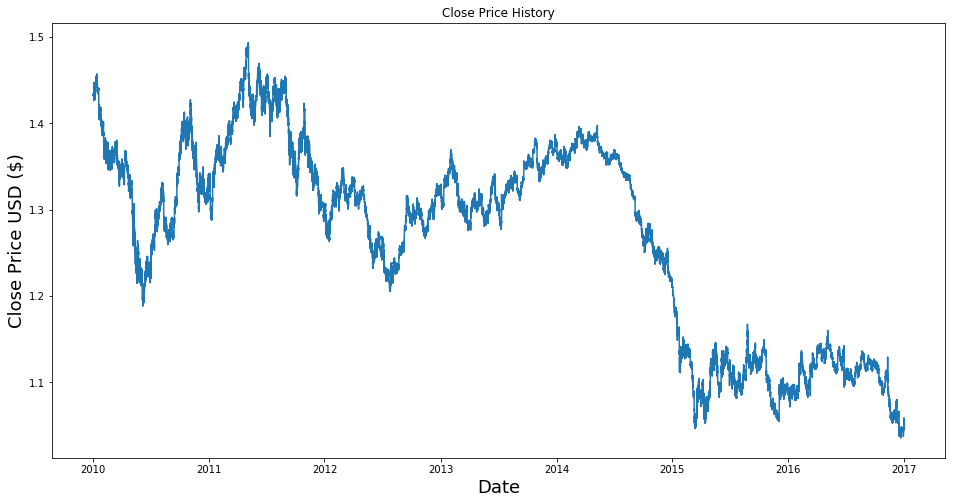

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [35]:
#Create a new dataframe with only the 'Close' column
my_df = df.filter(['Close'])
my_df.head()


,Close
Time,
2010-01-01 00:00:00,1.43293
2010-01-01 00:15:00,1.43275
2010-01-01 00:30:00,1.43281
2010-01-01 00:45:00,1.43276
2010-01-01 01:00:00,1.43282


In [38]:
# A variable for predicting 
forecast_out = 30 
#Create another column
my_df['Prediction'] = my_df[['Close']].shift(-forecast_out)

my_df.tail(40)


,Close,Prediction
Time,,
2016-12-31 14:00:00,1.0515,1.0515
2016-12-31 14:15:00,1.0515,1.0515
2016-12-31 14:30:00,1.0515,1.0515
2016-12-31 14:45:00,1.0515,1.0515
2016-12-31 15:00:00,1.0515,1.0515
2016-12-31 15:15:00,1.0515,1.0515
2016-12-31 15:30:00,1.0515,1.0515
2016-12-31 15:45:00,1.0515,1.0515
2016-12-31 16:00:00,1.0515,1.0515


# cleaning data

In [39]:
#drop duplicated rows - if any
my_df=my_df.drop_duplicates(keep='first')

In [41]:
my_df.shape

(184031, 2)

# Create the independent data set (X) 

In [43]:
# Convert the dataframe to a numpy array
X = np.array(my_df.drop(['Prediction'],1))

#Remove the last NaN rows
X = X[:-forecast_out]
print(X)

[[1.43293]
 [1.43275]
 [1.43281]
 ...
 [1.05458]
 [1.05364]
 [1.05385]]


# Create the dependent data set (y)

In [44]:
# Convert the dataframe to a numpy array
y = np.array(my_df['Prediction'])

y = y[:-forecast_out]
print(y)

[1.43328 1.43324 1.43266 ... 1.05156 1.0515  1.0515 ]


# Split the data into 80% training and 20% testing

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the Support Vector Machine (Regressor)


In [46]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Testing Model: Score

In [47]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8355287004543515


# Create and train the Linear Regression Model

In [48]:
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Testing Model: Score


In [51]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9986017170565059


In [53]:
# Set x_forecast equal to the last 30 rows of the original data set from Close column
x_forecast = np.array(my_df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1.055  ]
 [1.05512]
 [1.05655]
 [1.05762]
 [1.05479]
 [1.05571]
 [1.05564]
 [1.05573]
 [1.05518]
 [1.05499]
 [1.0538 ]
 [1.05354]
 [1.05462]
 [1.05336]
 [1.05285]
 [1.05307]
 [1.05271]
 [1.05264]
 [1.0525 ]
 [1.05286]
 [1.05343]
 [1.05318]
 [1.05299]
 [1.05361]
 [1.05247]
 [1.0518 ]
 [1.05191]
 [1.05156]
 [1.0515 ]
 [1.0515 ]]


In [54]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1.05505119 1.05517113 1.05660046 1.05766997 1.05484128 1.05576085
 1.05569089 1.05578085 1.0552311  1.05504119 1.05385174 1.05359186
 1.05467136 1.05341195 1.05290219 1.05312208 1.05276225 1.05269228
 1.05255235 1.05291218 1.05348192 1.05323203 1.05304212 1.05366183
 1.05252236 1.05185267 1.05196262 1.05161279 1.05155281 1.05155281]
[1.14020307 1.14027375 1.14111615 1.14174658 1.14007938 1.1406213
 1.14058006 1.14063308 1.1403091  1.14019718 1.13949629 1.13934317
 1.13997924 1.13923716 1.13893683 1.13906638 1.13885439 1.13881317
 1.13873073 1.13894272 1.13927839 1.13913116 1.13901927 1.13938439
 1.13871307 1.13831856 1.13838333 1.13817725 1.13814193 1.13814193]
